In [1]:
from pyspark.sql import SparkSession

In [2]:
spark = SparkSession.builder.appName("linearRegression").getOrCreate()

In [3]:
from pyspark.ml.regression import LinearRegression

In [4]:
data = spark.read.csv('btn.csv',inferSchema =True, header=True)

In [5]:
data.printSchema()

root
 |-- pembukaan: integer (nullable = true)
 |-- tertinggi: integer (nullable = true)
 |-- terendah: integer (nullable = true)
 |-- penutupan: integer (nullable = true)
 |-- volume: integer (nullable = true)
 |-- nilai: long (nullable = true)
 |-- frekuensi: integer (nullable = true)



In [6]:
data.show()

+---------+---------+--------+---------+--------+-----------+---------+
|pembukaan|tertinggi|terendah|penutupan|  volume|      nilai|frekuensi|
+---------+---------+--------+---------+--------+-----------+---------+
|     1220|     1230|    1220|     1230| 3115100| 3820350000|      776|
|     1235|     1235|    1215|     1220| 8122300| 9931786500|     1685|
|     1230|     1240|    1220|     1230| 7070600| 8695708500|     1147|
|     1210|     1235|    1210|     1225|16704500|20467481000|     1758|
|     1205|     1210|    1195|     1195| 9472900|11350644500|     2132|
|     1220|     1220|    1200|     1205| 8649300|10435545500|     1678|
|     1220|     1225|    1205|     1210|11109600|13463535000|     2499|
|     1220|     1230|    1210|     1220|18702700|22756047000|     3203|
|     1260|     1265|    1225|     1225|22094100|27265348000|     4244|
|     1285|     1285|    1260|     1265| 8324200|10564550500|     2122|
|     1290|     1290|    1275|     1285|11062900|14187152000|   

In [7]:
data.head(1)[0]

Row(pembukaan=1220, tertinggi=1230, terendah=1220, penutupan=1230, volume=3115100, nilai=3820350000, frekuensi=776)

In [8]:
for item in data.head(1)[0]:
    print(item)

1220
1230
1220
1230
3115100
3820350000
776


In [9]:
from pyspark.ml.linalg import Vectors

In [10]:
from pyspark.ml.feature import VectorAssembler

In [11]:
data.columns

['pembukaan',
 'tertinggi',
 'terendah',
 'penutupan',
 'volume',
 'nilai',
 'frekuensi']

In [12]:
assembler = VectorAssembler(inputCols=['pembukaan',
 'tertinggi',
 'terendah',
 'penutupan',
 'volume',
 'nilai',
 'frekuensi'],outputCol= 'features')

In [13]:
output = assembler.transform(data)

In [14]:
output.head(1)

[Row(pembukaan=1220, tertinggi=1230, terendah=1220, penutupan=1230, volume=3115100, nilai=3820350000, frekuensi=776, features=DenseVector([1220.0, 1230.0, 1220.0, 1230.0, 3115100.0, 3820350000.0, 776.0]))]

In [15]:
final_data = output.select('features', 'penutupan')

In [16]:
final_data.show()

+--------------------+---------+
|            features|penutupan|
+--------------------+---------+
|[1220.0,1230.0,12...|     1230|
|[1235.0,1235.0,12...|     1220|
|[1230.0,1240.0,12...|     1230|
|[1210.0,1235.0,12...|     1225|
|[1205.0,1210.0,11...|     1195|
|[1220.0,1220.0,12...|     1205|
|[1220.0,1225.0,12...|     1210|
|[1220.0,1230.0,12...|     1220|
|[1260.0,1265.0,12...|     1225|
|[1285.0,1285.0,12...|     1265|
|[1290.0,1290.0,12...|     1285|
|[1275.0,1290.0,12...|     1290|
|[1295.0,1300.0,12...|     1270|
|[1280.0,1295.0,12...|     1295|
|[1300.0,1300.0,12...|     1280|
|[1295.0,1305.0,12...|     1295|
|[1265.0,1295.0,12...|     1290|
|[1270.0,1275.0,12...|     1265|
|[1260.0,1280.0,12...|     1270|
|[1255.0,1265.0,12...|     1260|
+--------------------+---------+
only showing top 20 rows



In [17]:
train_data, test_data = final_data.randomSplit([0.7,0.3])

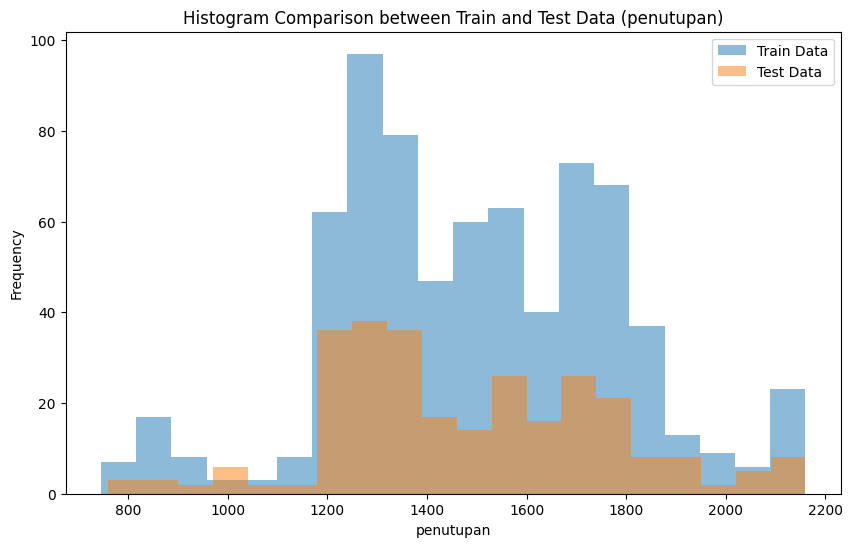

In [18]:
import matplotlib.pyplot as plt

# Ambil kolom yang ingin dibandingkan ('penutupan')
column_to_compare = 'penutupan'

# Konversi DataFrame Spark ke Pandas untuk plotting
train_data_pd = train_data.select(column_to_compare).toPandas()
test_data_pd = test_data.select(column_to_compare).toPandas()

# Plot histogram
plt.figure(figsize=(10, 6))

plt.hist(train_data_pd[column_to_compare], bins=20, alpha=0.5, label='Train Data')
plt.hist(test_data_pd[column_to_compare], bins=20, alpha=0.5, label='Test Data')

plt.xlabel(column_to_compare)
plt.ylabel('Frequency')
plt.title(f'Histogram Comparison between Train and Test Data ({column_to_compare})')
plt.legend()

plt.show()



In [19]:
train_data.describe().show()

+-------+------------------+
|summary|         penutupan|
+-------+------------------+
|  count|               723|
|   mean|1498.9626556016597|
| stddev|  281.677975679615|
|    min|               745|
|    max|              2160|
+-------+------------------+



In [20]:
lr = LinearRegression(labelCol="penutupan")

In [25]:
lr_model = lr.fit(train_data)

In [26]:
# Mendapatkan koefisien dari model regresi
coefficients = lr_model.coefficients

# Menyusun koefisien dan nama variabel ke dalam dictionary
coef_dict = {'intercept': lr_model.intercept}
for i, coef in enumerate(coefficients):
    coef_dict[f'feature{i+1}'] = coef

# Tampilkan koefisien untuk setiap variabel
for variable, coef in coef_dict.items():
    print(f'{variable}: {coef}')


intercept: -1.2519877989425772e-11
feature1: -2.2534590636530504e-16
feature2: 1.3743436534572607e-13
feature3: 1.088538081101196e-13
feature4: 0.999999999999762
feature5: 1.2162404206757784e-19
feature6: -1.6920187596648242e-23
feature7: -9.799910826612075e-16


In [27]:
test_results = lr_model.evaluate(test_data)

In [28]:
test_results.residuals.show(n=1004)

+--------------------+
|           residuals|
+--------------------+
|-4.18367562815547...|
|3.183231456205249...|
|-2.16004991671070...|
|3.183231456205249...|
|1.591615728102624...|
|2.387423592153936...|
|1.068656274583190...|
|2.046363078989088...|
|1.011812855722382...|
|1.432454155292362...|
|-4.66116034658625...|
|-2.30784280574880...|
|-6.36646291241049...|
|-1.43245415529236...|
|-5.91171556152403...|
|-2.25099938688799...|
|-9.09494701772928...|
|5.229594535194337...|
|-4.09272615797817...|
|-2.27373675443232...|
|-1.75077730091288...|
|-6.36646291241049...|
|-1.81898940354585...|
|1.818989403545856...|
|2.273736754432320...|
|9.094947017729282...|
|-2.04636307898908...|
|3.865352482534945...|
|2.273736754432320...|
|2.728484105318784...|
|                 0.0|
|2.955857780762016...|
|-3.18323145620524...|
|1.136868377216160...|
|3.637978807091713...|
|3.865352482534945...|
|3.865352482534945...|
|9.094947017729282...|
|-2.72848410531878...|
|4.320099833421409...|
|3.86535248

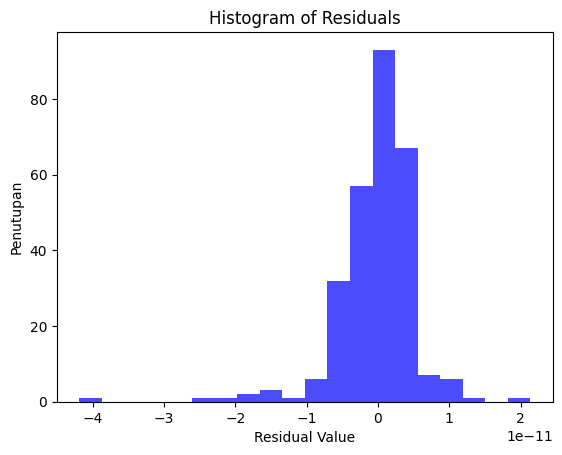

In [29]:
import matplotlib.pyplot as plt

# Dapatkan residual dari hasil evaluasi
residuals = test_results.residuals.toPandas()["residuals"]

# Buat histogram residual
plt.hist(residuals, bins=20, color='blue', alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Penutupan')
plt.title('Histogram of Residuals')
plt.show()



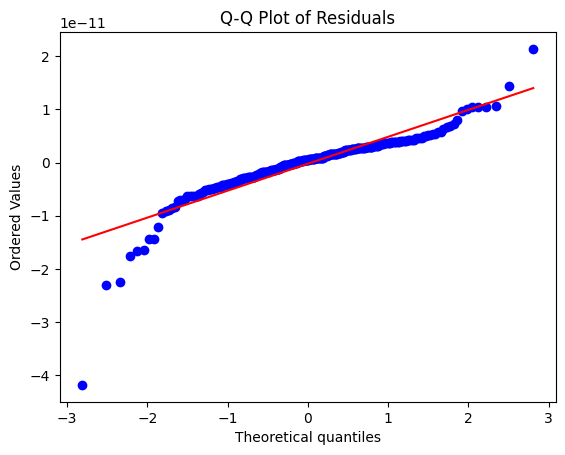

In [30]:
import scipy.stats as stats


# Create Q-Q plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


In [31]:
test_results.rootMeanSquaredError

5.532194238147449e-12

In [32]:
test_results.r2

1.0

In [33]:
final_data.describe().show()

+-------+------------------+
|summary|         penutupan|
+-------+------------------+
|  count|              1002|
|   mean|1493.8373253493014|
| stddev|280.35392303634734|
|    min|               745|
|    max|              2160|
+-------+------------------+



In [34]:
unlabeled_data = test_data.select('features')

In [35]:
unlabeled_data.show()


+--------------------+
|            features|
+--------------------+
|[0.0,810.0,760.0,...|
|[0.0,820.0,785.0,...|
|[0.0,825.0,770.0,...|
|[0.0,870.0,820.0,...|
|[0.0,880.0,840.0,...|
|[0.0,900.0,880.0,...|
|[0.0,935.0,850.0,...|
|[0.0,945.0,910.0,...|
|[0.0,995.0,925.0,...|
|[0.0,1010.0,900.0...|
|[0.0,1050.0,1005....|
|[0.0,1085.0,950.0...|
|[0.0,1100.0,975.0...|
|[0.0,1120.0,1015....|
|[0.0,1160.0,1080....|
|[0.0,1185.0,1060....|
|[0.0,1230.0,1160....|
|[0.0,1240.0,1185....|
|[0.0,1265.0,1225....|
|[0.0,1265.0,1230....|
+--------------------+
only showing top 20 rows



In [36]:
predictions = lr_model.transform(unlabeled_data)

In [37]:
predictions.show()

+--------------------+------------------+
|            features|        prediction|
+--------------------+------------------+
|[0.0,810.0,760.0,...| 760.0000000000418|
|[0.0,820.0,785.0,...| 809.9999999999968|
|[0.0,825.0,770.0,...| 780.0000000000022|
|[0.0,870.0,820.0,...| 839.9999999999968|
|[0.0,880.0,840.0,...| 844.9999999999984|
|[0.0,900.0,880.0,...| 879.9999999999976|
|[0.0,935.0,850.0,...| 919.9999999999893|
|[0.0,945.0,910.0,...|  919.999999999998|
|[0.0,995.0,925.0,...| 989.9999999999899|
|[0.0,1010.0,900.0...|1004.9999999999857|
|[0.0,1050.0,1005....|1005.0000000000047|
|[0.0,1085.0,950.0...|1010.0000000000231|
|[0.0,1100.0,975.0...|1010.0000000000064|
|[0.0,1120.0,1015....|1025.0000000000143|
|[0.0,1160.0,1080....| 1080.000000000006|
|[0.0,1185.0,1060....|1060.0000000000225|
|[0.0,1230.0,1160....| 1180.000000000009|
|[0.0,1240.0,1185....|1239.9999999999948|
|[0.0,1265.0,1225....| 1225.000000000004|
|[0.0,1265.0,1230....|1230.0000000000023|
+--------------------+------------